## Business Case:- Texas Salary Prediction

* The Texas state government employs a workforce across multiple agencies, roles, and employment statuses. Accurately predicting employee salaries is essential for budgeting, equity analysis, and operational efficiency. The dataset includes key attributes such as agency, class title, ethnicity, gender, hours worked, and multiple-job roles, offering a rich basis for building predictive models.



## Domain Analysis

In [1]:
## importing the libraries.
import pandas as pd                      # importing pandas for analyzing, cleaning, exploring, and manipulating data.
import numpy as np                       # importing numpy for mathematical operations on arrays and matrices.
import matplotlib.pyplot as plt          # importing matplotlib for create plots and graphs.
import seaborn as sns                    # importing seaborn for data visualization.
import warnings                          # we used to warnings for ignore warning messages. 
warnings.filterwarnings("ignore")

In [2]:
## loading the dataset to pandas dataframe.
data = pd.read_csv("salary.csv")
data        ## call variable 

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns', None)    #expand the all columns

In [4]:
data  ## call variable

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


## Feature Information

1. **AGENCY**: The name of the organization or government body that the employee works for.
2. **AGENCY NAME**: The specific agency within the larger organization.
3. **LAST NAME**: The employee's last name.
4. **FIRST NAME**: The employee's first name.
5. **MI (Middle Initial)**: The employee's middle initial, if applicable.
6. **CLASS CODE**: A code identifying the employee's job classification.
7. **CLASS TITLE**: The title or description of the employee's job.
8. **ETHNICITY**: The employee's ethnic background.
9. **GENDER**: The employee's gender.
10. **STATUS**: The employment status of the individual (e.g., full-time, part-time, contract).
11. **EMPLOY DATE**: The date the employee was hired.
12. **HRLY RATE**: The employee’s hourly pay rate.
13. **HRS PER WK**: The number of hours the employee works per week.
14. **MONTHLY**: The employee's monthly salary.
15. **ANNUAL**: The employee's annual salary.
16. **STATE NUMBER**: Likely refers to a state or employee identification number.
17. **duplicated**: A flag that may indicate if the employee record is a duplicate.
18. **multiple_full_time_jobs**: Whether the employee holds more than one full-time job.
19. **combined_multiple_jobs**: The combined salary for employees holding multiple jobs.
20. **summed_annual_salary**: The total salary after summing across jobs or positions.
21. **hide_from_search**: Whether the record is hidden from search results for privacy or security reasons.


In [5]:
# Here,we are drop to not need of column.
data.drop(columns=['AGENCY','LAST NAME','FIRST NAME','MI','EMPLOY DATE','duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

## Basic Check

In [6]:
## It show first five rows of the dataset.
data.head()

,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,165030


In [7]:
## It show last five rows of the dataset.
data.tail()

,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00,40.0,2899.00,34788.00,770781
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00,40.0,5500.00,66000.00,847431
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93,20.0,1120.60,13447.20,34266
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00,40.0,5744.16,68929.92,123490
149480,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,11.74,20.0,1017.46,12209.52,103583


In [8]:
# Display summary information about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY NAME   149481 non-null  object 
 1   CLASS CODE    149481 non-null  object 
 2   CLASS TITLE   149481 non-null  object 
 3   ETHNICITY     149481 non-null  object 
 4   GENDER        149481 non-null  object 
 5   STATUS        149481 non-null  object 
 6   HRLY RATE     149481 non-null  float64
 7   HRS PER WK    149481 non-null  float64
 8   MONTHLY       149481 non-null  float64
 9   ANNUAL        149481 non-null  float64
 10  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 12.5+ MB


In [9]:
## It show the statistical information of data.
data.describe(include = "O")

,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS
count,149481,149481,149481,149481,149481,149481
unique,113,1481,1422,6,2,11
top,HEALTH AND HUMAN SERVICES COMMISSION ...,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
freq,36667,9267,9267,67142,85328,142502


In [10]:
## It show the statistical information of data.
data.describe()

,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


* The dataset shows a diverse workforce with significant variation in hourly rates, most employees working close to 40 hours per week, and a wide salary range from 600 to 5,53,500 annually, indicating both low and high-paying positions, with many employees earning relatively low wages.

## Exploratory Data Anlaysis

EDA is a crucial step in the data analysis process. It involves exploring the dataset to gain a deeper understanding of its characteristics, patterns, and underlying structure. The primary goals of EDA are to summarize the key attributes of the dataset, identify relationships between variables, detect anomalies, and check assumptions. This step helps ensure that the data is clean and prepared for further analysis or modeling.

* There are three type of EDA :-
1)Univariate Analysis
2)Bivariate Analysis
3)Multivariate Analysis

## Step:- 1 Univariate Analysis

In [11]:
## Analyze and summarize a single variable



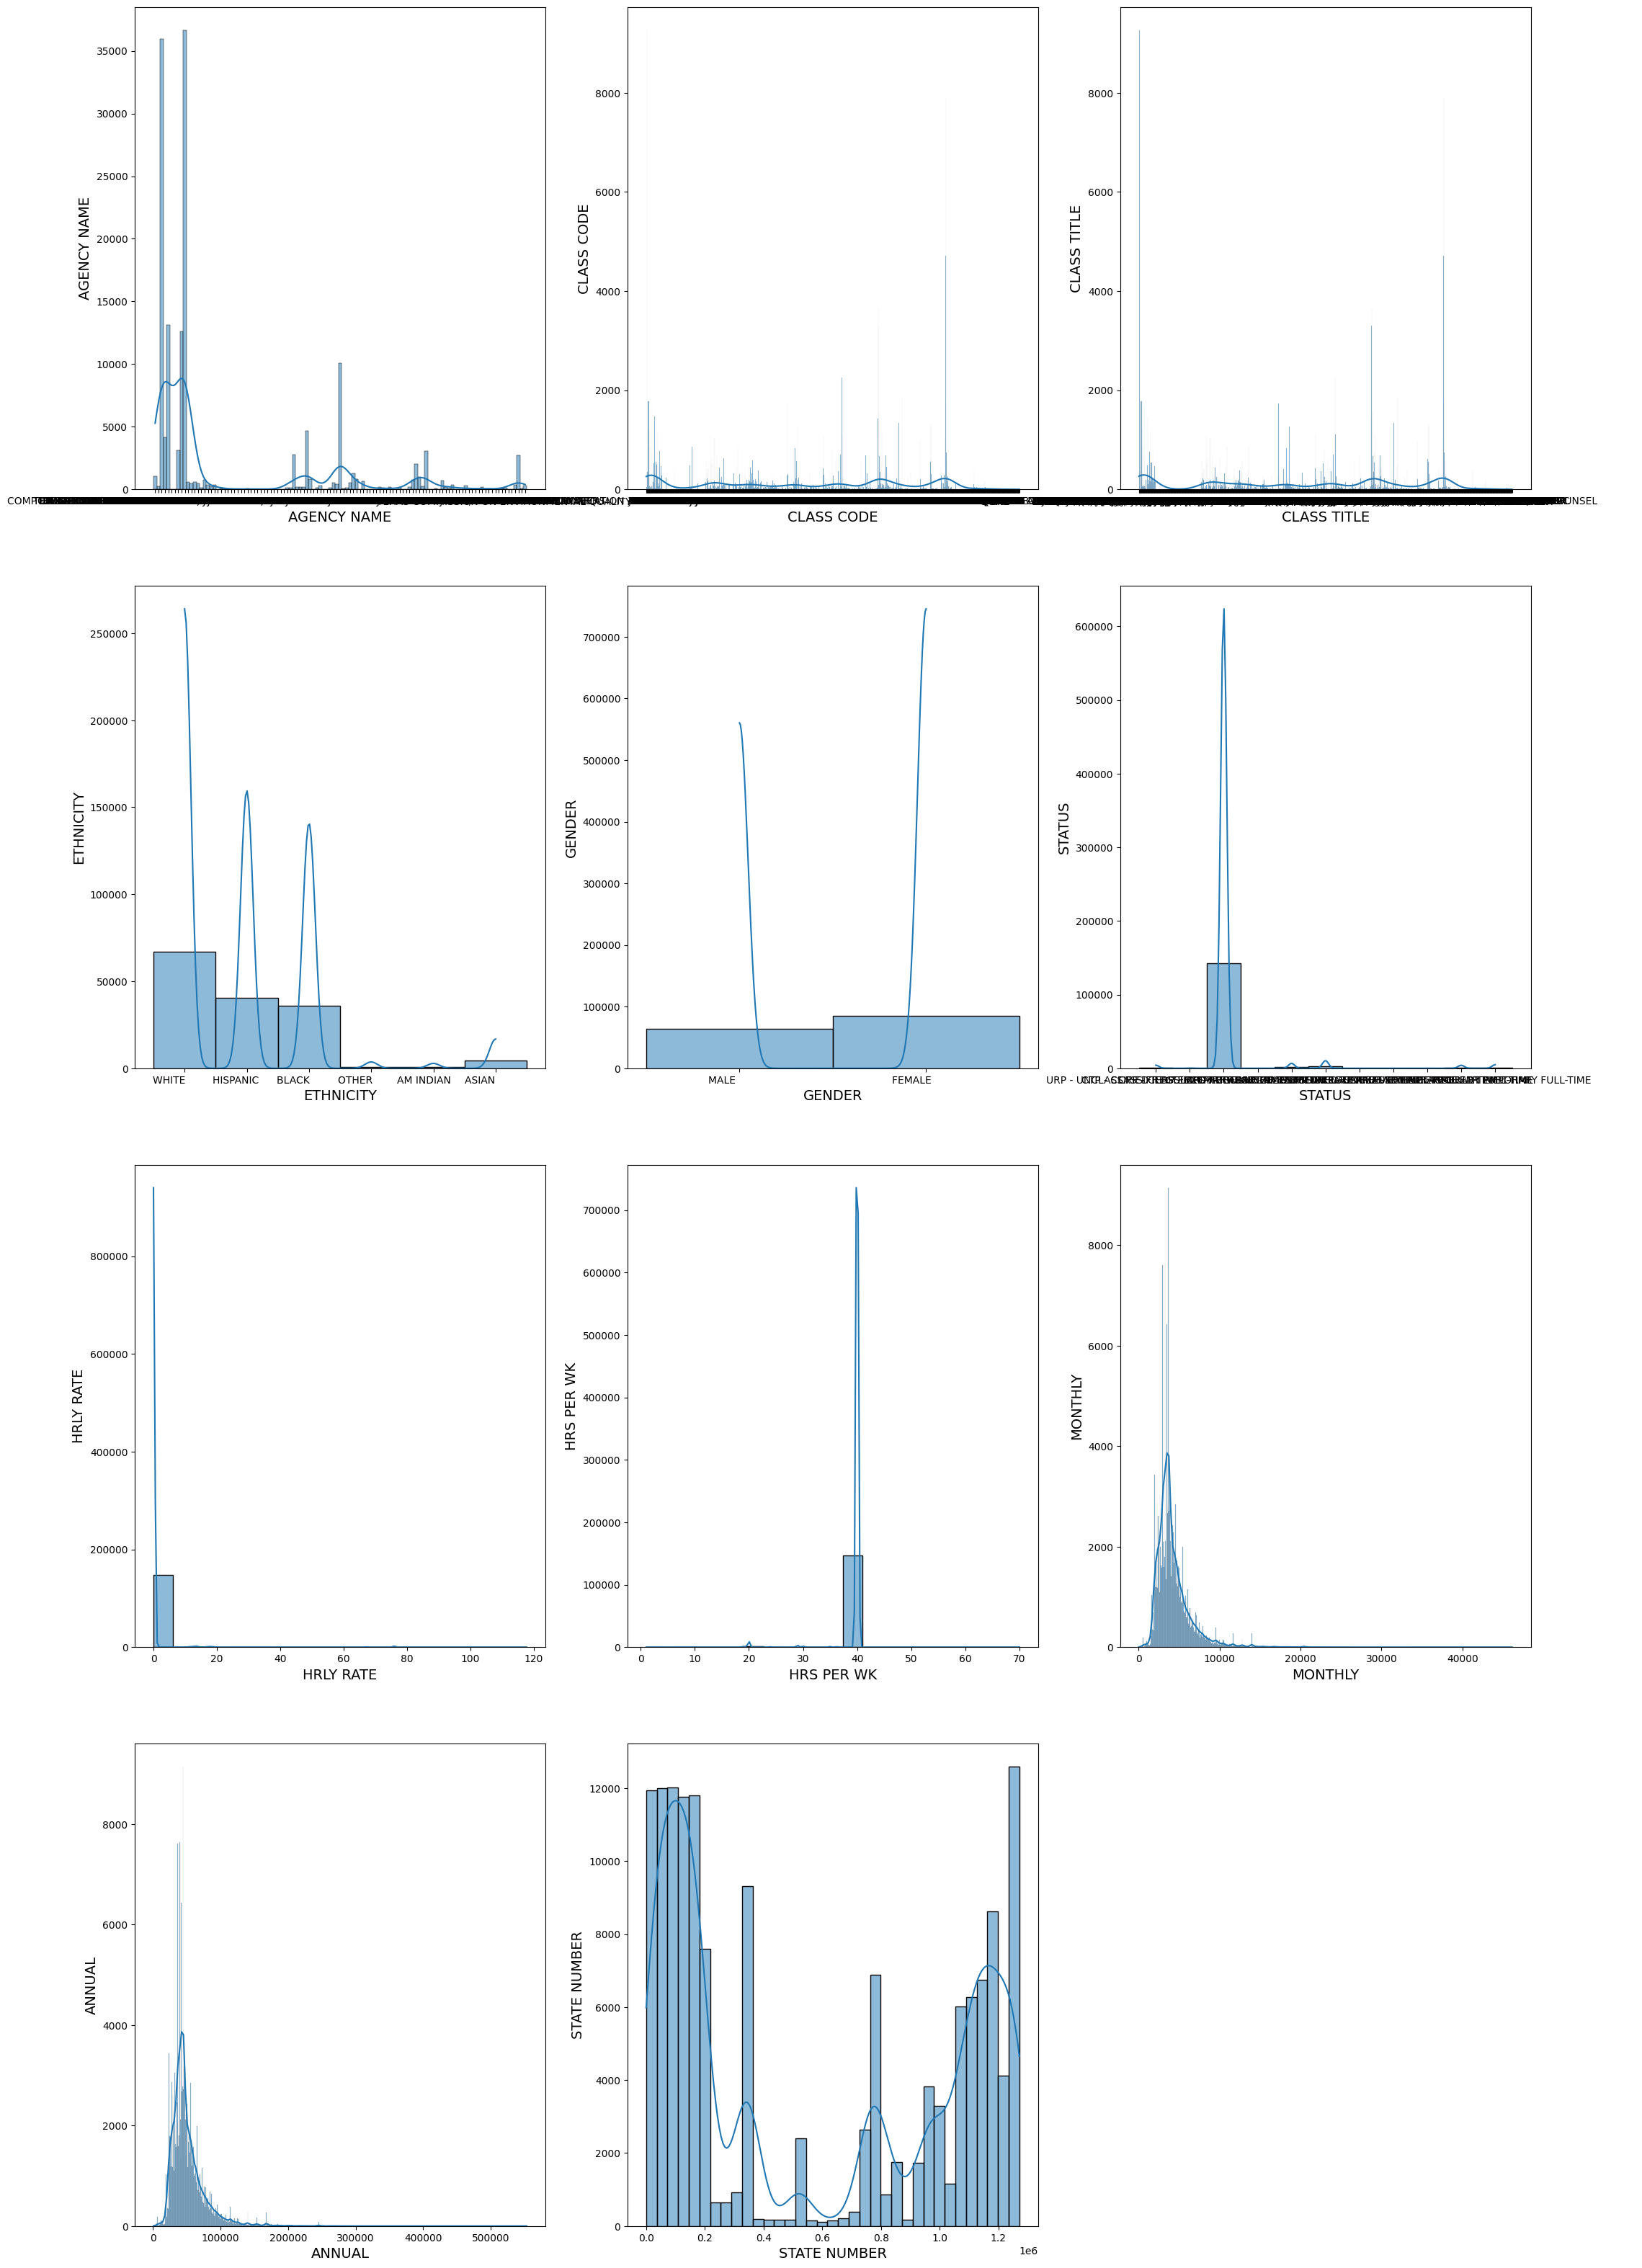

In [12]:
plt.figure(figsize=(25,40))     #define a figure size
plot_num=1
for columns in data:  
        if plot_num<=11:  # limit to 15 column
                plt.subplot(4,3,plot_num)            #create rows and column grid in 6x4
                sns.histplot(data[columns],kde=True) # Create histplot with KDE
                plt.xlabel(columns,fontsize=14)      # X-axis label
                plt.ylabel(columns,fontsize=14)      # Y-axis label
                plot_num+=1
plt.show()   # show the data

* By Analysis we can say that most variables show right-skewed distribution,indicating a concentratin of data points in the lower range.The majority of employees earn low hourly rates, with a few extreme outliers earning significantly higher wages.Most employees work close to the standard 40 hours per week, with minimal variation.

## Step:-2 Brivariate Analysis

In [13]:
## Bivariate Analysis refers to plots between input variables and target variable.Analyze the relationship between two variables.

<Axes: xlabel='GENDER', ylabel='ANNUAL'>

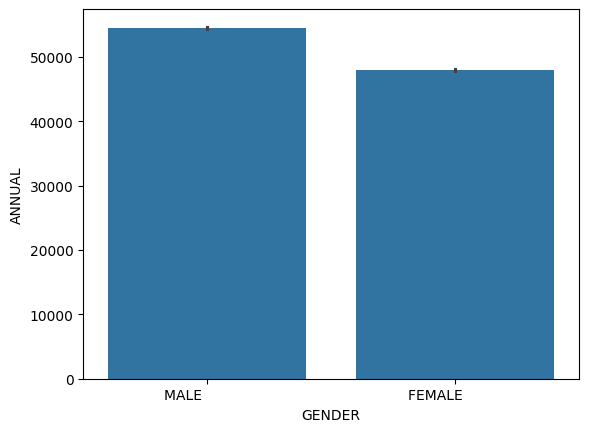

In [14]:
## Aanlyzing the relationship between GENDER and ANNUAL.
sns.barplot(x="GENDER",y="ANNUAL",data=data)

* By analysis we can say that male have the highest annual income compared to female.

<Axes: xlabel='HRS PER WK', ylabel='MONTHLY'>

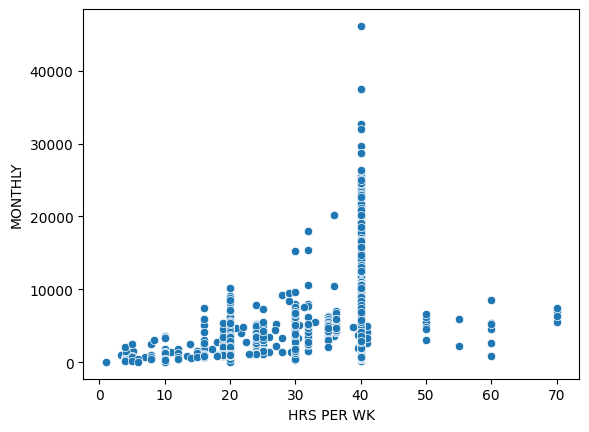

In [15]:
## Aanlyzing the relationship between HRS PER WK and MONTHLY.
sns.scatterplot(x="HRS PER WK",y="MONTHLY",data=data)

* By analysis we can say that monthly income of someone who works 40 hours a week is higher than that of someone who works other hours.

<Axes: xlabel='GENDER', ylabel='MONTHLY'>

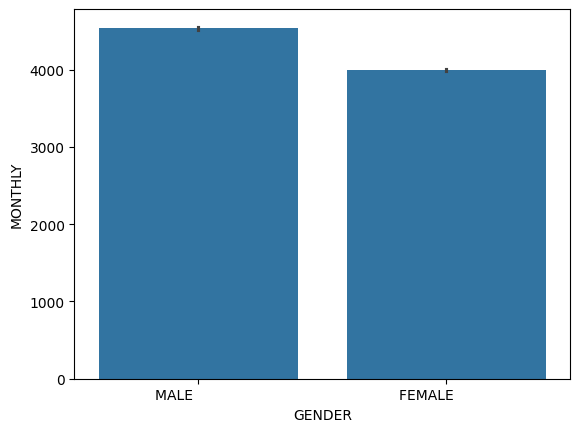

In [16]:
## Aanlyzing the relationship between GENDER and MONTHLY.
sns.barplot(x="GENDER",y="MONTHLY",data=data)

* By analysis we can say that male have the highest monthly income compared to female.

## Step:- 3 Multivariante Analysis

In [17]:
## Analyze the relationship in all columns.

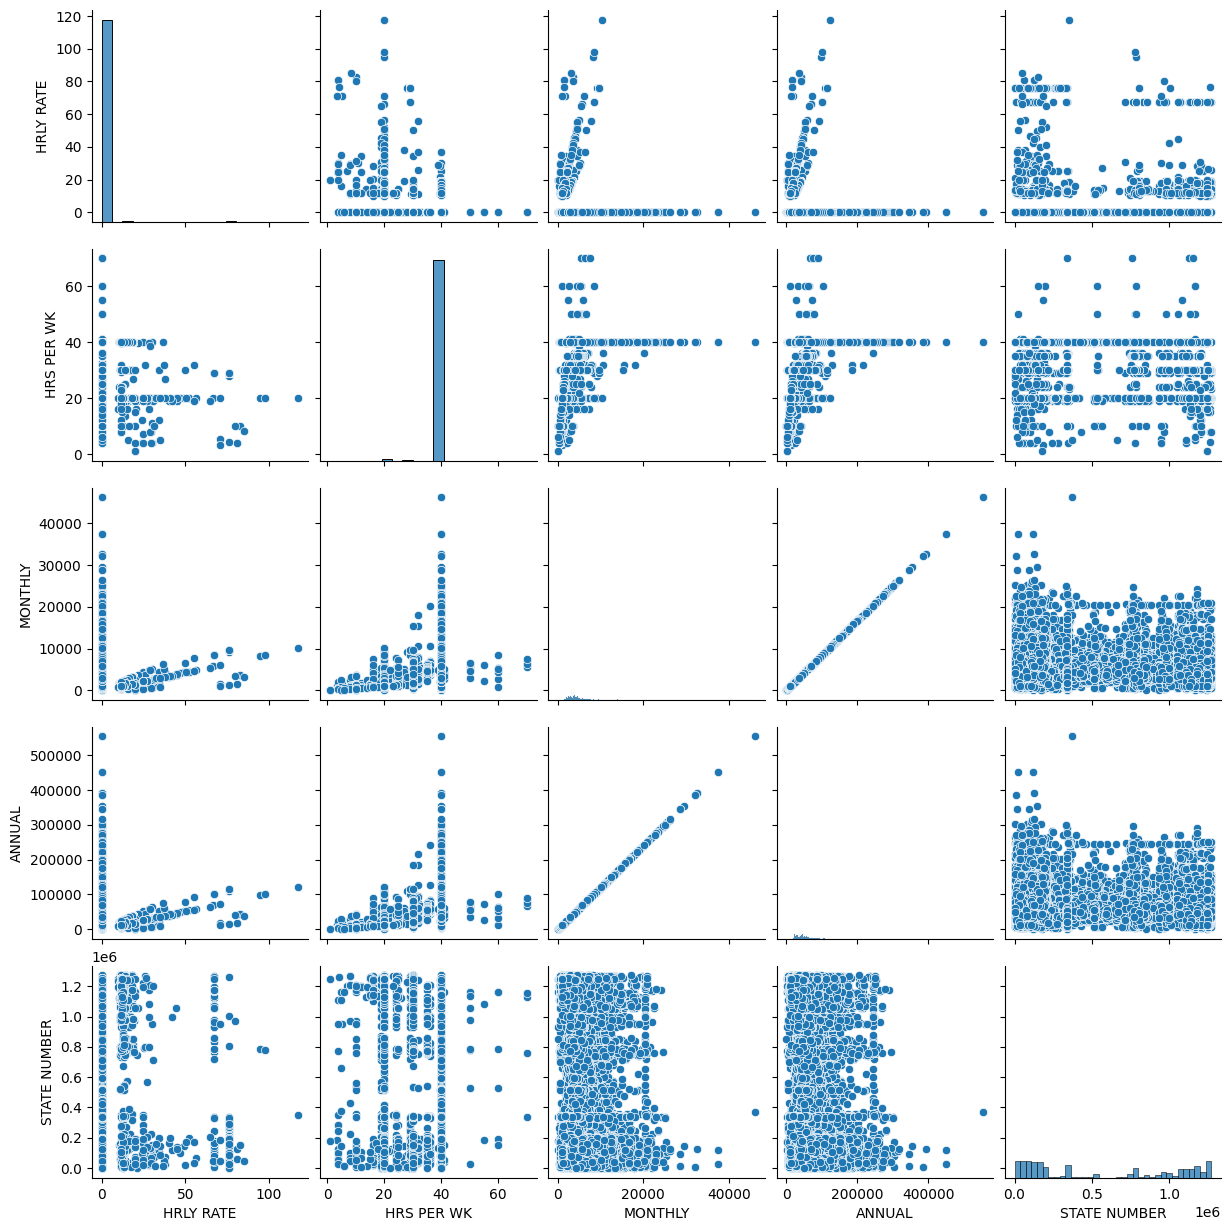

In [18]:
sns.pairplot(data=data)

* Here, we can't see any insights in graph.`

## Report Of EDA

* The analysis highlights significant wage disparities, a highly skewed salary distribution, and outliers that influence averages. Departments and roles play a critical role in determining compensation, with part-time and combined jobs often leading to discrepancies.Hourly rates, salaries, and working hours exhibit heavy right-skewed distributions.This EDA provides a foundation for informed decision-making regarding salary policies and resource allocation in Texas agencies.

## Feature Engineering

* Feature engineering is an essential step in the data preprocessing process. By leveraging domain knowledge and creativity, you can transform raw data into meaningful features that enhance the performance of machine learning models. Creating new features or modifying existing ones can help the model capture more relevant patterns and relationships, ultimately improving its ability to make accurate predictions.

### Data Preprocessing

* Data preprocessing is a foundational step in the machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format that is suitable for analysis and modeling. Proper data preprocessing ensures that the model performs optimally and provides reliable results. Below is a breakdown of the main steps involved in data preprocessing.



* Handling missing values is an essential aspect of data preprocessing. Missing or incomplete data can lead to biased or inaccurate results, distorting the performance of statistical analyses and machine learning models. Here's a breakdown of why handling missing values is important and how to address them effectively:



In [19]:
## step 1: Handling the missing values.
data.isnull().sum()

AGENCY NAME     0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

* It gives the no null value in dataframe.

Encoding Categorical Variables : Categorical variables need to be transformed into numerical formats for machine learning models.

* Label Encoding
* One-Hot Encoding
* Ordinal Encoding

In [20]:
## Replace the column name
data.rename(columns={'AGENCY NAME':'agency_name','CLASS CODE':'class_code','CLASS TITLE':'class_title','ETHNICITY':'ethnicity','GENDER':'gender','STATUS':'status','HRLY RATE':'hrly_rate','HRS PER WK':'hrs_per_wk','MONTHLY':'monthly','ANNUAL':'annual','STATE NUMBER':'state_number'}, inplace=True)

In [21]:
## step 2 :Convert to categorical data to numerical data. 
# check unique value from agency_name column. 

## Agency Name:-

In [22]:
#Count the frequency of each unique value in the 'agency_name' column.
data.agency_name.value_counts() 

agency_name
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64

* We will apply Label Encoder for this column.

## Class Code :

In [23]:
#Count the frequency of each unique value in the 'class_code' column.
data.class_code.value_counts()

class_code
4504        9267
4505        7895
4503        4718
5622        3646
5121        3307
            ... 
U101           1
U104           1
E176           1
U103           1
E096           1
Name: count, Length: 1481, dtype: int64

* We will apply Label Encoder for tgis column.

## Class Title

In [24]:
#Count the frequency of each unique value in the 'class_title' column.
data.class_title.value_counts()

class_title
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

* We will apply Label Encoder for this column.

## Ehnicity :

In [25]:
#Count the frequency of each unique value in the 'ethnicity' column.
data.ethnicity.value_counts()

ethnicity
WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: count, dtype: int64

* It have six unique value.
* We will use Label Encoder for this column.

## Status

In [26]:
#Count the frequency of each unique value in the 'status' column.
data.status.value_counts()

status
CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: count, dtype: int64

* It have eleven unique value.
* We will use Label Encoder for this column.

## Gender

In [27]:
#Count the frequency of each unique value in the 'gender' column.
data.gender.value_counts() 

gender
FEMALE             85328
MALE               64153
Name: count, dtype: int64

* It have two unique value.
* We will use One-Hot Encoder for this column.

In [28]:
#importing OneHotEncoder from preprocessing
from sklearn.preprocessing import OneHotEncoder  
OHE = pd.get_dummies(data.gender,dtype=int,prefix="gender") # Here we are apply OneHot Encoding on gender features and store in OHE variable.

In [29]:
data = pd.concat([data,OHE],axis=1)             # Here we are merging of gender column and data into data. Now, we don't need thal features we will drop.

In [30]:
data.drop(columns='gender',axis=1,inplace=True)  # drop gender column

In [31]:
#importing Label from preprocessing
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()                                # Initialize the LabelEncoder

# List of columns to encode
label_encoder=['agency_name','class_code','class_title','ethnicity','status']

In [32]:
# Apply LabelEncoder to each column in the list
for column in label_encoder:
    data[column] =label.fit_transform(data[column])

Handling Outliers : Outliers can significantly impact the performance of machine learning models.

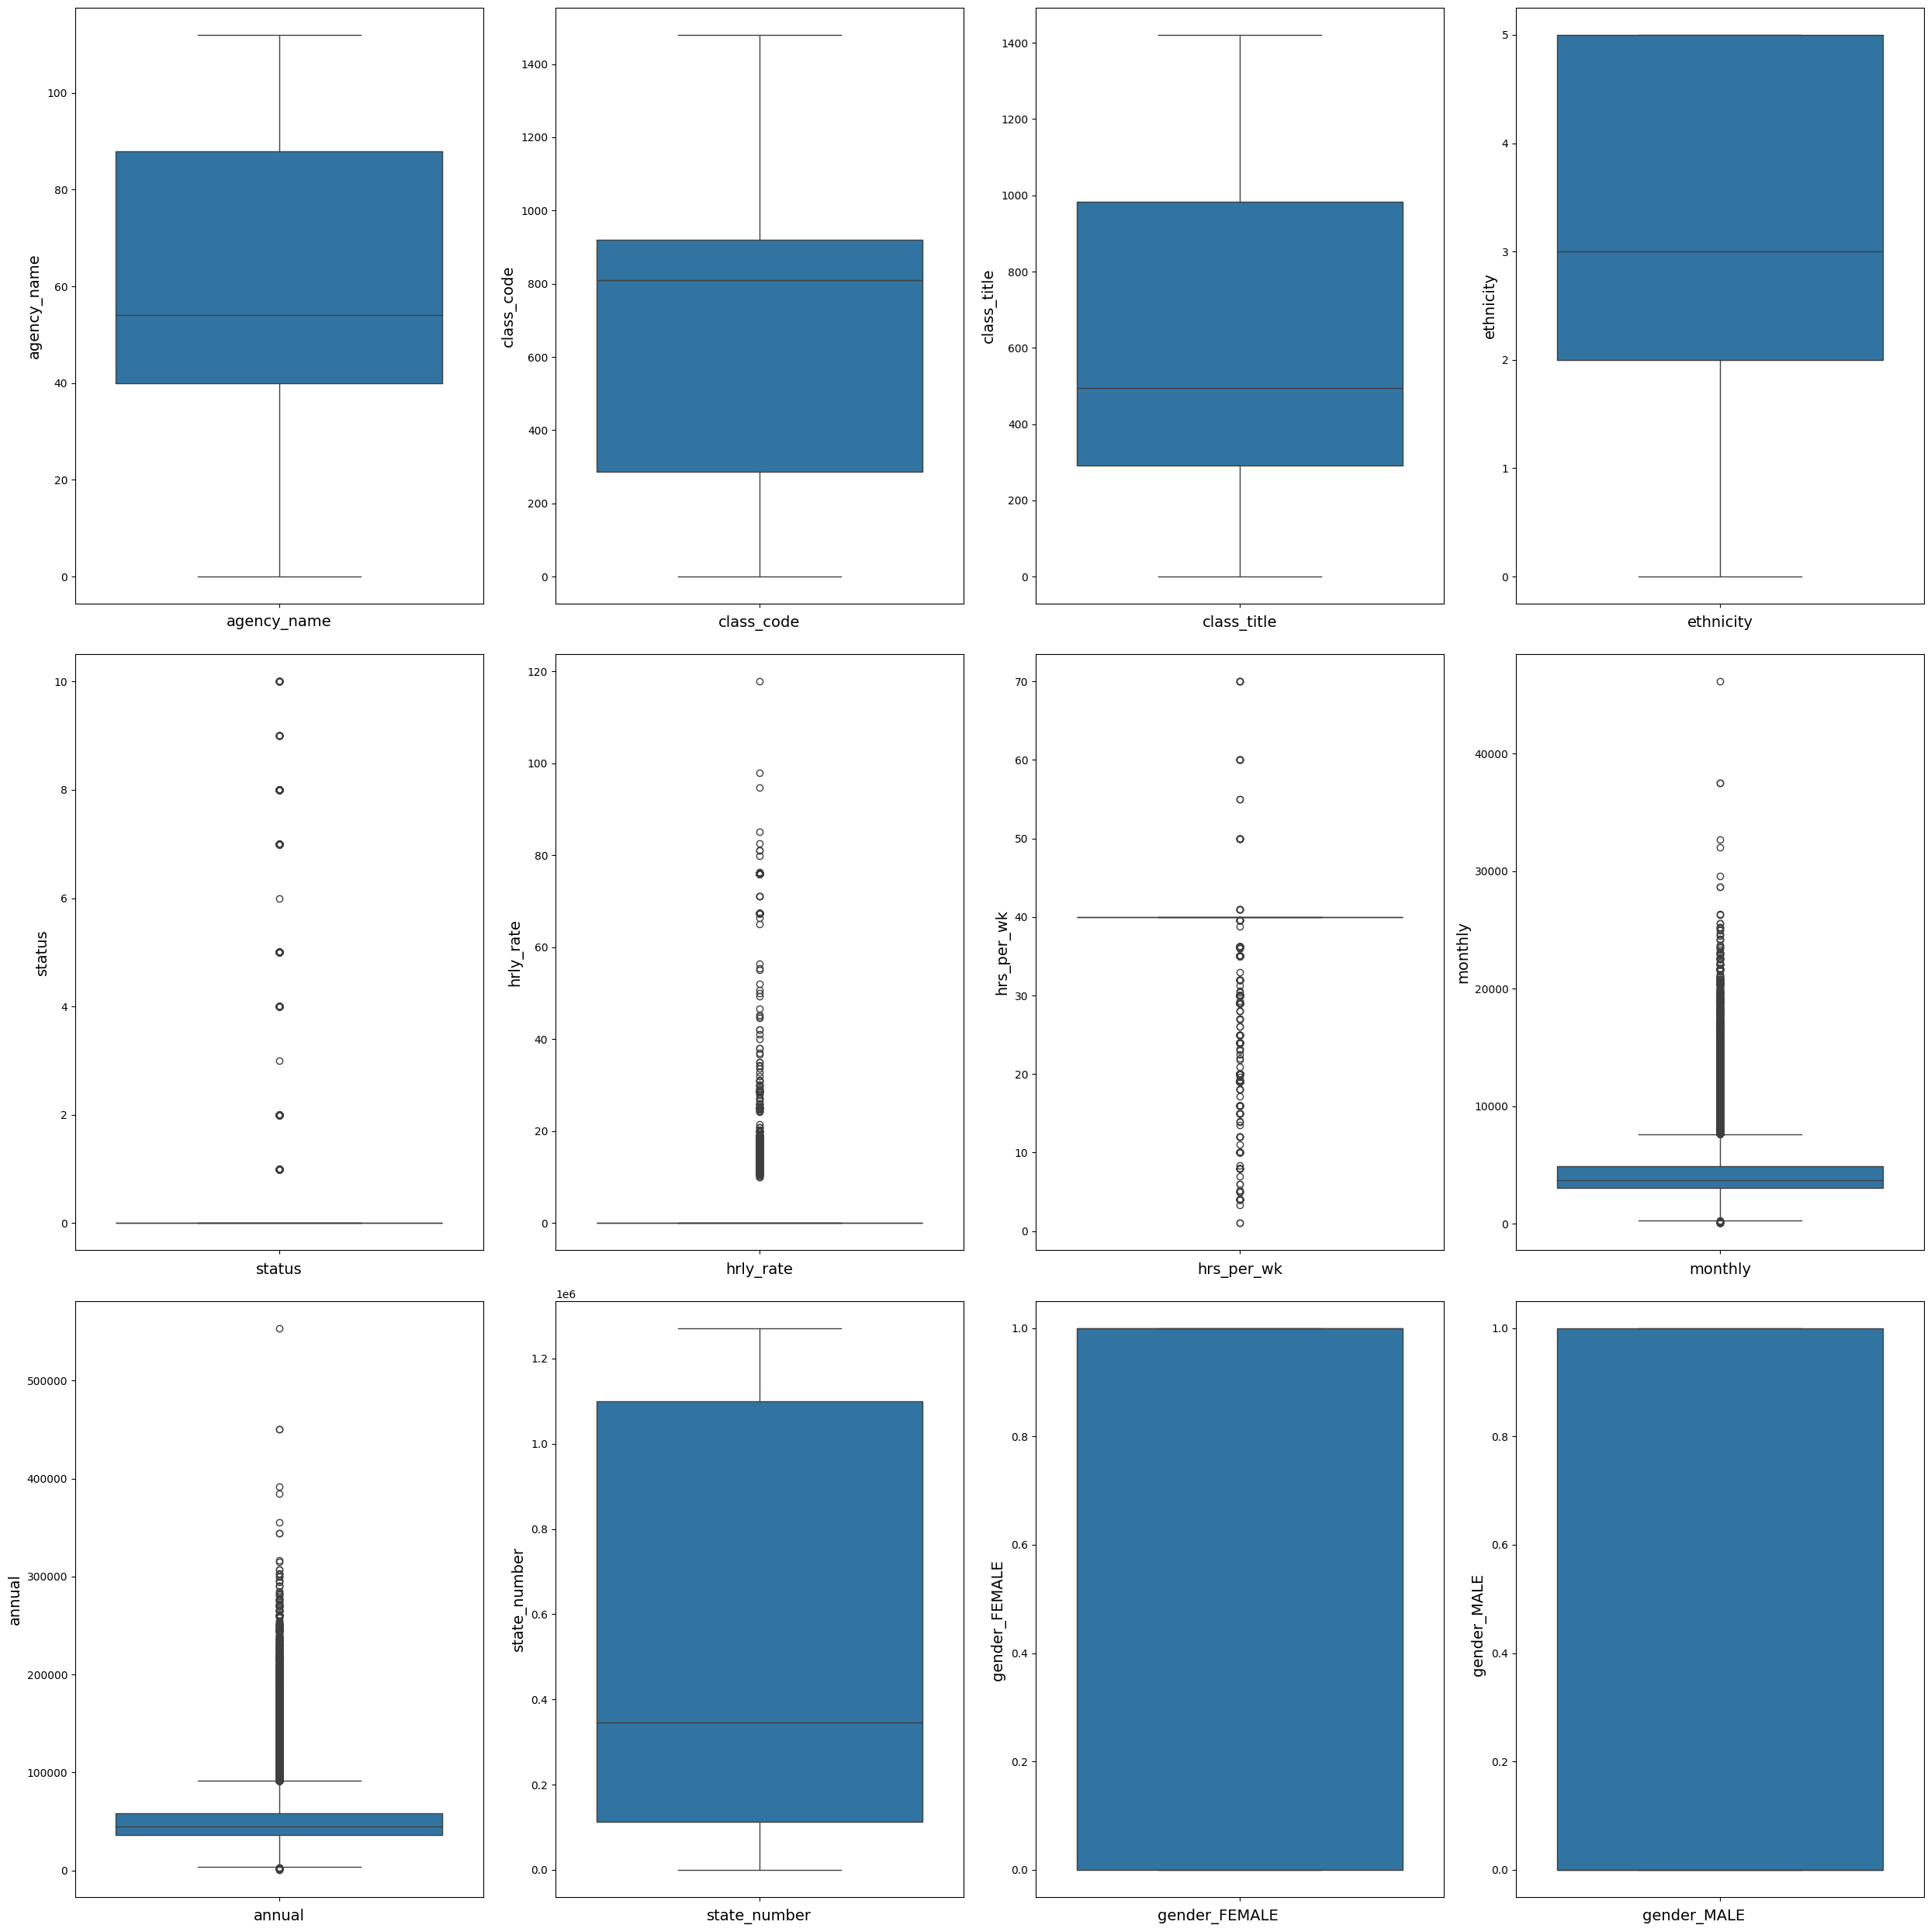

In [33]:
## step 3 : checking outliers
plt.figure(figsize=(25,25))    #define a figure size
plot_num=1
for check in data.columns:
        plt.subplot(3,4,plot_num)                #create rows and column grid in 4x4
        sns.boxplot(data[check])                 # Create boxplot using of check outliers
        plt.xlabel(check,fontsize=14)            # X-axis label
        plt.ylabel(check,fontsize=14)            # Y-axis label
        plot_num+=1
plt.tight_layout()     # show the data

In [34]:
## remove outliers using of measures of central tendency only of continues column
data.loc[data["hrly_rate"]>110,"hrly_rate"]

33247    117.78848
Name: hrly_rate, dtype: float64

In [35]:
data.loc[data["hrly_rate"]>110,"hrly_rate"]=data.hrly_rate.median()

In [36]:
data.loc[data["hrs_per_wk"]>65,"hrs_per_wk"]

85    70.0
89    70.0
93    70.0
99    70.0
Name: hrs_per_wk, dtype: float64

In [37]:
data.loc[data["hrs_per_wk"]>65,"hrs_per_wk"]=data.hrs_per_wk.median()

In [38]:
data.loc[data["monthly"]>35000,"monthly"]

14793     37500.0
83851     46125.0
144232    37500.0
Name: monthly, dtype: float64

In [39]:
data.loc[data["monthly"]>35000,"monthly"]=data.monthly.median()

In [40]:
data.loc[data["annual"]>55000,"annual"]

0         114549.84
2         114549.84
5         154788.00
6          70026.00
7         120000.00
            ...    
149464     68959.92
149469     83015.28
149475    175989.96
149477     66000.00
149479     68929.92
Name: annual, Length: 44624, dtype: float64

In [41]:
data.loc[data["annual"]>55000,"annual"]=data.annual.median()

<b>Scaling :</b> is an essential technique in the data preprocessing stage, particularly for continuous features.Scaling helps to standardize the range of features, making them comparable and improving model performance.

* It is technique to convert all data into certain range.

<b>The types of scalling are :</b>
1) Min-Max Scaling : Min-Max scaling transforms the data to a specific range, usually between 0 and 1. The values are rescaled according to the minimum and maximum values of the feature.
2) Standardization : - Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [42]:
## step 4 : feature scaling
from sklearn.preprocessing import StandardScaler    #importing StandardScaler from preprocessing
scaler = StandardScaler()                           # Define the StandardScaler object

In [43]:
# here we are taking all columns where we have to apply scaling.
sc = ['agency_name', 'class_code', 'class_title', 'ethnicity','status','hrly_rate','hrs_per_wk', 'monthly','annual','state_number']  

In [44]:
# here we are applying Standard Scaling
df = scaler.fit_transform(data[sc])  

In [45]:
df    #call variable

array([[-1.50007103,  2.04614953,  0.21516168, ...,  2.54959429,
         0.5206717 , -0.91403696],
       [-0.42552661, -0.04907545, -0.1583747 , ..., -1.35170753,
        -2.98297811, -0.91403696],
       [-1.50007103,  2.04614953,  0.21516168, ...,  2.54959429,
         0.5206717 , -1.05736999],
       ...,
       [ 0.54502965, -1.66607128, -0.74217991, ..., -1.48788565,
        -3.4129825 , -1.10928805],
       [ 0.54502965, -0.94212217,  0.94739194, ...,  0.72778714,
         0.5206717 , -0.92286861],
       [ 0.54502965, -1.66607128, -0.74217991, ..., -1.53731174,
        -3.56905335, -0.96446114]])

## Feature Selection

<b>Feature selection :</b> is a critical step in the data preprocessing pipeline, where the goal is to select the most important features from the original set of features in a dataset. By choosing only the relevant features, we aim to improve the performance of machine learning models. This process can help reduce complexity, improve model accuracy, and speed up the training process.

# corrlation : identifying highly correlated fetures and removing one of them.


In [46]:
data.corr()  #check corrlation

,agency_name,class_code,class_title,ethnicity,status,hrly_rate,hrs_per_wk,monthly,annual,state_number,gender_FEMALE,gender_MALE
agency_name,1.000000,-0.052702,-0.150526,0.030906,-0.009776,-0.054452,-0.012497,-0.085755,0.063872,0.021148,-0.190787,0.190787
class_code,-0.052702,1.000000,0.144373,-0.056818,0.225200,0.091772,-0.068920,-0.075228,-0.055875,0.047658,-0.127360,0.127360
class_title,-0.150526,0.144373,1.000000,0.044255,0.009949,0.014340,0.012151,0.086317,0.105901,-0.092181,-0.060309,0.060309
ethnicity,0.030906,-0.056818,0.044255,1.000000,0.090649,0.052547,-0.024068,0.170260,0.107093,-0.074631,-0.106739,0.106739
status,-0.009776,0.225200,0.009949,0.090649,1.000000,0.389049,-0.309338,0.182844,-0.058454,-0.007632,-0.033160,0.033160
hrly_rate,-0.054452,0.091772,0.014340,0.052547,0.389049,1.000000,-0.337815,0.086271,-0.028958,-0.007859,-0.041429,0.041429
hrs_per_wk,-0.012497,-0.068920,0.012151,-0.024068,-0.309338,-0.337815,1.000000,0.096120,0.273063,-0.010298,-0.001732,0.001732
monthly,-0.085755,-0.075228,0.086317,0.170260,0.182844,0.086271,0.096120,1.000000,0.528618,-0.265968,-0.129252,0.129252
annual,0.063872,-0.055875,0.105901,0.107093,-0.058454,-0.028958,0.273063,0.528618,1.000000,-0.258847,-0.121086,0.121086
state_number,0.021148,0.047658,-0.092181,-0.074631,-0.007632,-0.007859,-0.010298,-0.265968,-0.258847,1.000000,0.003143,-0.003143


<Axes: >

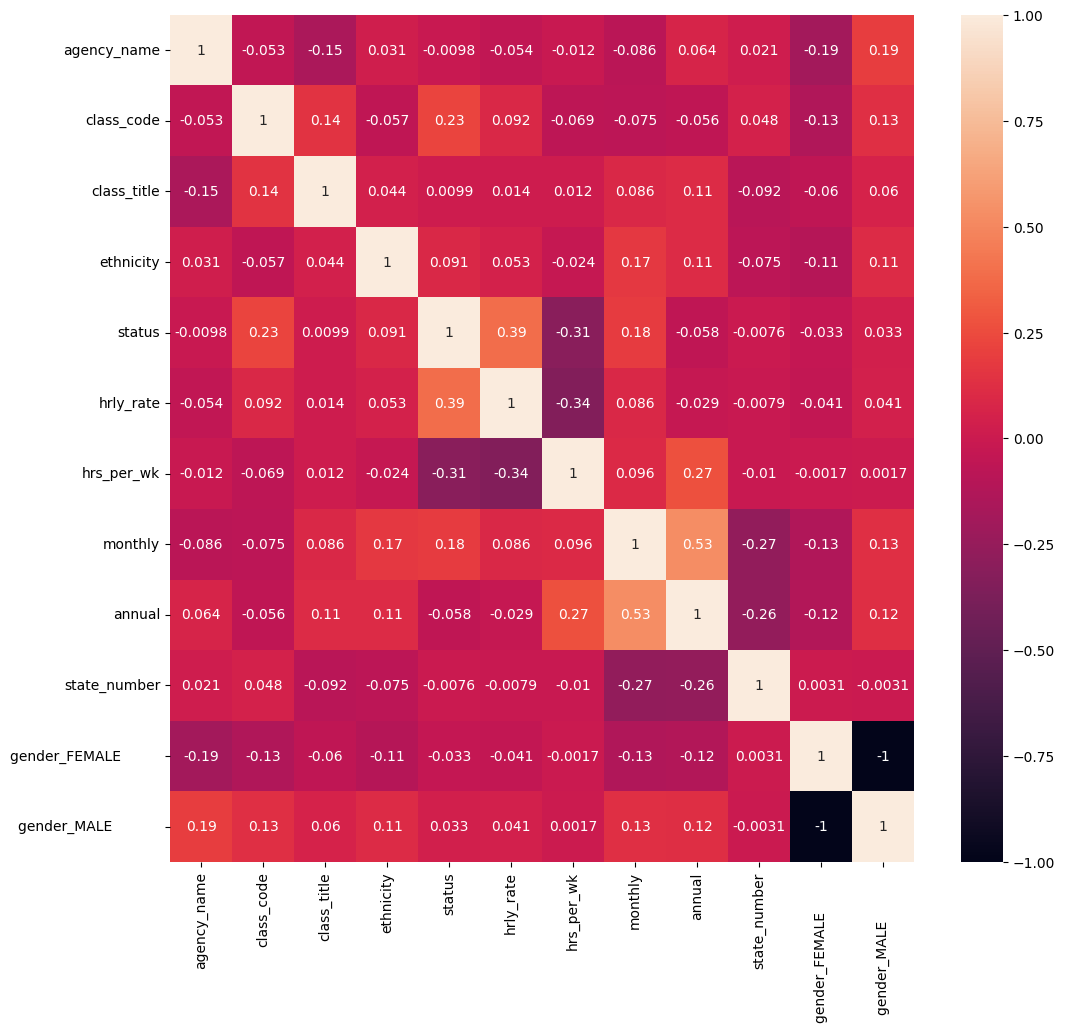

In [47]:
## We have check correlation
plt.figure(figsize=(12,11))                                #increase plot size
sns.heatmap(data.corr(),annot_kws={'size':10},annot=True)  # craete a heatmap check the relationship

## Model Creation

In [48]:
## Creating independent and dependent variable
x = data.drop(["annual"],axis=1)
y = data.annual

In [49]:
x

,agency_name,class_code,class_title,ethnicity,status,hrly_rate,hrs_per_wk,monthly,state_number,gender_FEMALE,gender_MALE
0,17,1409,711,5,8,75.96150,29.0,9545.82,127717,0,1
1,48,616,560,5,4,81.04454,4.0,1404.77,127717,0,1
2,17,1409,711,5,8,75.96150,29.0,9545.82,59115,0,1
3,48,616,560,5,4,81.04453,4.0,1404.77,59115,0,1
4,88,810,292,3,0,0.00000,40.0,3284.27,165030,1,0
...,...,...,...,...,...,...,...,...,...,...,...
149476,76,1042,1198,5,0,0.00000,40.0,2899.00,770781,0,1
149477,76,84,1404,5,0,0.00000,40.0,5500.00,847431,1,0
149478,76,4,324,5,1,12.93000,20.0,1120.60,34266,0,1
149479,76,278,1007,5,0,0.00000,40.0,5744.16,123490,0,1


In [50]:
y

0         44642.04
1         16857.24
2         44642.04
3         16857.24
4         39411.24
            ...   
149476    34788.00
149477    44642.04
149478    13447.20
149479    44642.04
149480    12209.52
Name: annual, Length: 149481, dtype: float64

## PCA

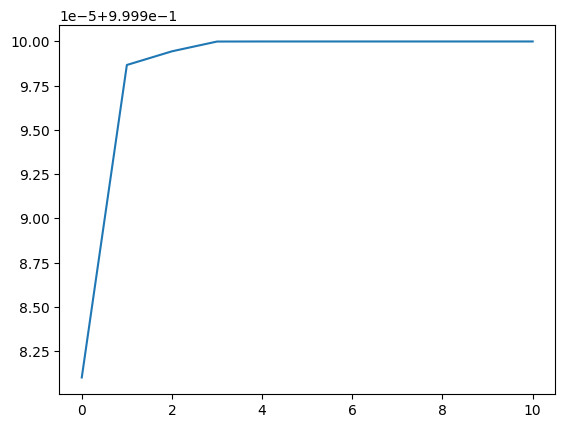

In [51]:
from sklearn.decomposition import PCA              #import the PCA class from sklearn.decomposition
pca = PCA()                                        #create an instance of PCA
principle_components = pca.fit_transform(x)        #fit the PCA model to the data
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #plot the cumulative sum of the explained variance ratio
plt.show()    #show the plot

In [52]:
np.where(np.cumsum(pca.explained_variance_ratio_) <9.95)
#Find the indices where the cumulative sum of the explained variance ratio 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),)

In [53]:
pca = PCA(n_components=10)       #Initialize PCA with 10 components (reduce to 10 dimensions)
new_data = pca.fit_transform(x)  #Fit the PCA on the data 'x' and apply the dimensionality reduction
column_name = [f"principle_components {i}" for i in range(1,11)]         #Create a list of column names for the resulting principal components (PC1 to PC10)
principle_components = pd.DataFrame(data = new_data,columns=column_name) #Create a DataFrame using the transformed data (new_data) with the principal components as column names

In [54]:
principle_components

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10
0,-437481.875022,4803.074972,466.409033,712.555131,-35.057775,74.214424,8.103206,-0.088603,-0.536443,-0.194160
1,-437472.452547,-3328.680089,-68.849390,-6.436147,-16.857892,87.473104,-13.031263,-0.776537,-6.826013,-0.367017
2,-506083.828640,4723.431948,463.743934,716.258831,-35.103606,74.220424,8.110861,-0.093008,-0.530345,-0.198204
3,-506074.406165,-3408.323113,-71.514488,-2.732446,-16.903723,87.479094,-13.023611,-0.780943,-6.819914,-0.371062
4,-400161.629057,-1412.253703,-189.485130,335.707761,23.613996,-0.349241,0.502336,-0.544119,-0.085037,0.672856
...,...,...,...,...,...,...,...,...,...,...
149476,205589.346349,-1085.031348,716.838095,-17.182292,21.326130,-0.501971,0.405532,1.536796,-0.400603,-0.510220
149477,282236.226198,1619.305888,345.269103,-884.477684,23.493439,0.248121,-0.136934,1.008907,0.015221,0.772906
149478,-530923.064484,-3716.792208,-609.112836,-382.395695,7.055854,18.560817,-15.277454,0.710072,-2.221632,-0.928408
149479,-441704.529254,1015.235117,95.135414,-458.503511,19.889658,-0.027529,-0.029084,1.091242,-0.197436,-0.644543


In [55]:
principle_components.columns    #Get the column names of the DataFrame containing the principal components

Index(['principle_components 1', 'principle_components 2',
       'principle_components 3', 'principle_components 4',
       'principle_components 5', 'principle_components 6',
       'principle_components 7', 'principle_components 8',
       'principle_components 9', 'principle_components 10'],
      dtype='object')

## Model Selection

In [56]:
# creating training and testing data
from sklearn.model_selection import train_test_split                         #import the train_test_split function from sklearn.model_selection.
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=1)   #Split the dataset into training and testing sets

## test_size=0.25: 25% of the data will be used for testing
## random_state=1 : ensures reproducibility by fixing the seed for 1 number

In [57]:
len(x_train)  #length of X_train

112110

In [58]:
len(x_test)  #length of X_test

37371

In [59]:
y_train.value_counts()

annual
44642.04    38939
39411.24     4293
36238.08     3414
41769.24     2490
46873.08     1281
            ...  
54384.00        1
26498.88        1
37724.76        1
22180.68        1
50436.00        1
Name: count, Length: 16239, dtype: int64

In [60]:
y_test

61227     39520.92
132903    23748.36
129725    36238.08
93516     48000.00
139942    39393.84
            ...   
116182    39411.24
146502    35713.32
99272     14660.04
77894     44642.04
120688    23748.36
Name: annual, Length: 37371, dtype: float64

### <u>Linear Regression</u>

In [61]:
from sklearn.linear_model import LinearRegression   #import the LinearRegression function from sklearn.linear_model.
linear=LinearRegression()                           #object creation for LinearRegression 
linear.fit(x_train,y_train)                         # training the model

LinearRegression()

In [62]:
y_predict=linear.predict(x_test)               # predicting the testing model

In [63]:
y_pred=linear.predict(x_train)                     # predicting the training model

In [64]:
y_predict                                      # predicting model

array([39520.92, 23748.36, 36238.08, ..., 14660.04, 44642.04, 23748.36])

In [65]:
y_test

61227     39520.92
132903    23748.36
129725    36238.08
93516     48000.00
139942    39393.84
            ...   
116182    39411.24
146502    35713.32
99272     14660.04
77894     44642.04
120688    23748.36
Name: annual, Length: 37371, dtype: float64

## Evaluation of Model

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix

In [67]:
r2score1=r2_score(y_test,y_predict)    #checking testning r2score
r2score1

1.0

In [68]:
r1=r2_score(y_train,y_pred)            #checking training r2score
r1

1.0

In [69]:
m1=mean_squared_error(y_test,y_predict)   # check mean_squared_error
m1

2.7935186644534525e-20

In [70]:
m1=mean_absolute_error(y_test,y_predict)  # check mean_absolute_error
m1

1.3355554663736614e-10

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define parameters grid for LinearRegression
param_grid = {
    'fit_intercept': [True, False],  # Whether or not to calculate the intercept
    'copy_X': [True, False],         # Whether to copy the input data
    'n_jobs': [None, -1],            # Number of jobs to run in parallel
    'positive': [True, False]        # Whether to enforce positive coefficients
}

# Initialize linear regression model
linear = LinearRegression()

# Set up GridSearchCV with the linear regression estimator and parameter grid
rcv = GridSearchCV(estimator=linear, param_grid=param_grid, scoring='f1', refit=True, cv=3, verbose=1, n_jobs=-1)

# Fit the model to the training data
rcv.fit(x_train, y_train)
cv_best_params = rcv.best_params_##it will give you best parameters 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [72]:
print(f"Best paramters: {cv_best_params})")##printing  best parameters"

Best paramters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True})


In [73]:
from sklearn.linear_model import LinearRegression

# Initialize LinearRegression with valid parameters
lin = LinearRegression(fit_intercept=True, n_jobs=-1)

# Fit the model
lin.fit(x_train, y_train)


LinearRegression(n_jobs=-1)

In [74]:
y_harp=lin.predict(x_train)
y_harp1=lin.predict(x_test)

In [75]:
 r2score1=r2_score(y_test,y_harp1)    #checking testning r2score
r2score1

1.0

In [76]:
r=r2_score(y_train,y_harp)
r

1.0

## <u>Random Forest</u>

In [77]:
from sklearn.ensemble import RandomForestRegressor   # importing randomforest
rf=RandomForestRegressor()                           #object creation for random forest
rf.fit(x_train,y_train)                              # training the data

RandomForestRegressor()

In [78]:
y_predict1=rf.predict(x_train)      # predicting the training model

In [79]:
y_pred1=rf.predict(x_test)         # predicting the testing model

In [80]:
r1=r2_score(y_test,y_pred1)   #checking testning r2score
r1

0.999999796407896

In [81]:
r1=r2_score(y_train,y_predict1)         #checking training r2score
r1

0.9999999713717386

In [82]:
m2=mean_squared_error(y_test,y_pred1)       # check mean_squared_error
m2

12.65601022296985

In [83]:
m2=mean_squared_error(y_train,y_predict1)       # check mean_squared_error
m2

1.8073005957324761

## <u>Decision Tree</u>

In [84]:
from sklearn.tree import DecisionTreeRegressor   #importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()                        #object creation for decision tree
dt.fit(x_train,y_train)                             #train the model

DecisionTreeRegressor()

In [85]:
y_predict2=dt.predict(x_train)    # predicting the training model

In [86]:
y_pred2=dt.predict(x_test)      # predicting the testing model

In [138]:
r2=r2_score(y_test,y_pred2)      #checking testing r2score
r2

0.9999998761587715

In [139]:
r2=r2_score(y_train,y_predict2)    #checking training r2score
r2

0.9999999999999966

In [89]:
m3=mean_squared_error(y_test,y_pred2)   # check mean_squared_error
m3

7.698411795271819

In [90]:
m3=mean_squared_error(y_train,y_predict2)   # check mean_squared_error
m3

2.140455488862364e-07

## <u>Grident Boosting</u>

In [91]:
from sklearn.ensemble import GradientBoostingRegressor  #importing Gradient Boosting from sklearn.ensemble
gb=GradientBoostingRegressor()                          #object creation for Gradient Boosting
gb.fit(x_train,y_train)                                   # training the model

GradientBoostingRegressor()

In [92]:
y_predict3=gb.predict(x_train)     # predicting the training model

In [93]:
y_pred3=gb.predict(x_test)          # predicting the testing model

In [94]:
r4=r2_score(y_test,y_pred3)      #checking testing r2score
r4

0.9999594879547449

In [95]:
r4=r2_score(y_train,y_predict3)     #checking traning r2score
r4

0.9999606080229035

In [96]:
m4=mean_squared_error(y_train,y_predict3)   # check mean_squared_error
m4

2486.8133830045217

In [97]:
m4=mean_squared_error(y_test,y_pred3)   # check mean_squared_error
m4

2518.3730066781973

## <u>XGB </u>

In [98]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from xgboost import XGBRFRegressor
xgb=XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [100]:
y_predict4=xgb.predict(x_train)     # predicting the training model

In [101]:
y_pred4=xgb.predict(x_test)          # predicting the testing model

In [102]:
r5=r2_score(y_test,y_pred4)      #checking testing r2score
r5

0.999420735636721

In [103]:
r5=r2_score(y_train,y_predict4)      #checking traning r2score
r5

0.9994062677746751

In [104]:
m5=mean_squared_error(y_train,y_predict4)   # check mean_squared_error
m5

37482.283264004414

In [105]:
m5=mean_squared_error(y_test,y_pred4)   # check mean_squared_error
m5

36009.135728082605

## <u>K-Nearest Neighbors</u>

In [106]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [107]:
y_predict5=kn.predict(x_train)     # predicting the training model

In [108]:
y_pred5=kn.predict(x_test)  # predicting the training model

In [109]:
r6=r2_score(y_test,y_pred5)      #checking testing r2score
r6

0.9984517549938132

In [110]:
r6=r2_score(y_train,y_predict5)      #checking traning r2score
r6

0.9990591469983151

In [111]:
m6=mean_squared_error(y_test,y_pred5)   # check mean_squared_error
m6

96244.42327594764

In [112]:
m6=mean_squared_error(y_train,y_predict5)   # check mean_squared_error
m6

59395.99909646796

## ANN

In [113]:
from sklearn.neural_network import MLPRegressor
ANN=MLPRegressor()
ANN.fit(x_train,y_train)

MLPRegressor()

In [114]:
y_predict6=kn.predict(x_train)     # predicting the training model

In [115]:
y_pred6=kn.predict(x_test)  # predicting the training model

In [116]:
r7=r2_score(y_test,y_pred6)      #checking testing r2score
r7

0.9984517549938132

In [117]:
r7=r2_score(y_train,y_predict6)      #checking testing r2score
r7

0.9990591469983151

In [118]:
m7 = mean_squared_error(y_test, y_pred6)  
m7 # check mean_squared_error


96244.42327594764

In [119]:
m7 = mean_squared_error(y_train, y_predict6)  # Corrected variable name
m7


59395.99909646796

## Bagging

In [120]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()
br.fit(x_train,y_train)

BaggingRegressor()

In [121]:
y_predict7=kn.predict(x_train)     # predicting the training model

In [122]:
y_pred7=kn.predict(x_test)  # predicting the training model

In [123]:
r8=r2_score(y_test,y_pred7)      #checking testing r2score
r8

0.9984517549938132

In [124]:
r8=r2_score(y_train,y_predict7)      #checking testing r2score
r8

0.9990591469983151

In [125]:
m8 = mean_squared_error(y_test, y_pred7)  
m8                                       # check mean_squared_error

96244.42327594764

In [126]:
m8 = mean_squared_error(y_train, y_predict7)  # Corrected variable name
m8

59395.99909646796

In [140]:
# check the all algorithm model perforamnce in table form
score = pd.DataFrame({"Model":["LinearRegression","RandomForest","DecisionTree","GradiantBoosting","XGB","KNN","ANN","Bagging"],
                     "r2_score":[r2score1*100,r1*100,r2*100,r4*100,r5*100,r6*100,r7*100,r8*100]})
score  

,Model,r2_score
0,LinearRegression,100.000000
1,RandomForest,99.999997
2,DecisionTree,100.000000
3,GradiantBoosting,99.996061
4,XGB,99.940627
5,KNN,99.905915
6,ANN,99.905915
7,Bagging,99.905915


## Model Comparision Report:¶

*  I have used total 8 Algorithm like LinearRegression, RandomForest, DecisionTree, GradiantBoosting, XGBoost, KNN.
* Best Model: Linear Regression achieves the highest R² score 100 % suggesting it perfectly explains the variance in payroll data.
* Linear Regression : Achieves an R² score of 100%, indicating it perfectly explains the variance in the payroll data.Ideal for applications requiring simplicity, interpretability, and computational efficiency.
* Random Forest:A nearly perfect R² score 99.99 %.Suitable for capturing non-linear patterns, handling categorical variables, and providing robust predictions.
* Decision Tree:Performs slightly worse than Random Forest, likely due to overfitting tendencies.Useful when interpretability and simplicity are key considerations.
* Gradient Boosting & XGBoost:Both models are excellent at handling complex data.XGBoost is slightly faster and more efficient with large datasets.
* KNN:The weakest performer with a lower R² score 99.49%.Performance likely hindered by sensitivity to data scaling and noise.

## Who are the outliers in the salaries?


* The outliers in salaries are employees whose annual compensation significantly deviates from the central distribution, as identified by statistical methods like the Interquartile Range (IQR).
* Low Salary Outliers: 
12,480.00, $11,959.92, etc. These are likely associated with:
Part-time roles.
Temporary or contractual positions.
Limited hours worked per week.
* Low salaries from part-time or temporary roles can pull down the average and impact the predictions of certain models.
* High Salary Outliers:-
Senior managerial or executive roles.
Employees with combined multiple job positions.
* High salaries from senior positions or combined jobs create a skew in the data, affecting overall salary distribution and potentially biasing predictions.


## What deparments/roles have the biggest wage disparities between manager and employees?

In [128]:
# Load dataset
data = pd.read_csv("salary.csv")  

# Identify managers based on job title
data['is_manager'] = data['CLASS TITLE'].str.contains('Manager', case=False, na=False)

# Calculate average salaries for managers and employees by department
avg_salaries = data.groupby(['AGENCY NAME', 'is_manager'])['ANNUAL'].mean().unstack()

# Calculate wage disparity
avg_salaries['Wage Disparity'] = avg_salaries[True] - avg_salaries[False]

# Sort by wage disparity
result = avg_salaries.sort_values(by='Wage Disparity', ascending=False)

# Display top 10 departments with the biggest wage disparities
print(result[['Wage Disparity']].head(10))


is_manager                                          Wage Disparity
AGENCY NAME                                                       
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS    100849.848750
DEPARTMENT OF HOUSING AND COMMUNITY AFFAIRS           86748.302466
TEACHER RETIREMENT SYSTEM                             86409.883799
EMPLOYEES RETIREMENT SYSTEM                           79324.465977
TEXAS EDUCATION AGENCY                                56890.623813
STATE PRESERVATION BOARD                              49364.980364
STATE AUDITOR'S OFFICE                                46573.708118
TEXAS BOARD OF PROFESSIONAL ENGINEERS                 45520.844444
SECRETARY OF STATE                                    43694.454972
LEGISLATIVE BUDGET BOARD                              41608.675918


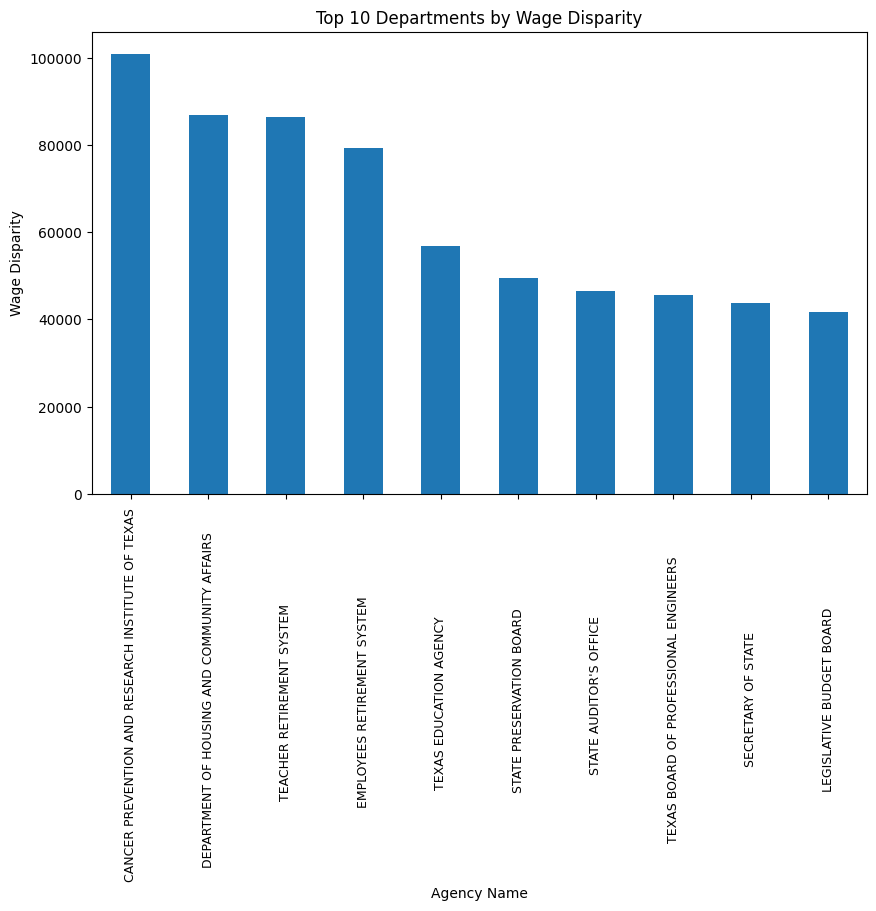

In [129]:
# Plot top departments by wage disparity
top_disparities = result['Wage Disparity'].head(10)
top_disparities.plot(kind='bar', figsize=(10, 6), title="Top 10 Departments by Wage Disparity")
plt.ylabel('Wage Disparity')
plt.xlabel('Agency Name')
plt.xticks(rotation=90,fontsize=9)
plt.show()

### **Key Insights on Wage Disparity**

1. **High Wage Disparity**:
   - Indicates large gaps between high-earning executives and low-wage employees.
   - Can negatively impact morale and employee retention.

2. **Low Wage Disparity**:
   - Suggests more equal pay distribution.
   - Can improve fairness but may limit motivation for advancement.

3. **Impact**:
   - **High disparity**: May harm recruitment and reputation.
   - **Low disparity**: Promotes retention but might lack pay differentiation.

4. **Recommendations**:
   - Conduct regular pay audits and ensure transparency to address unfair disparities.


## Have salaries and total compensation for some roles/departments/head-count changed over time?

In [130]:
# Load dataset
data = pd.read_csv("salary.csv")  

# Ensure 'Employ Date' is in datetime format and extract the year
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'])
data['Year'] = data['EMPLOY DATE'].dt.year

# Calculate total salary, average salary, and headcount by year and department
salary_trends = data.groupby(['Year', 'AGENCY NAME'])['ANNUAL'].sum()
avg_salary_trends = data.groupby(['Year', 'AGENCY NAME'])['ANNUAL'].mean()

# Display results
print("Total Salary Trends by Department:\n", salary_trends)
print("\nAverage Salary Trends by Department:\n", avg_salary_trends)


Total Salary Trends by Department:
 Year  AGENCY NAME                                       
1975  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     114549.84
1976  COMPTROLLER OF PUBLIC ACCOUNTS                        226313.16
      COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     114549.84
      TEXAS LEGISLATIVE COUNCIL                              95000.04
1977  COMPTROLLER OF PUBLIC ACCOUNTS                         65709.00
                                                              ...    
2069  TEXAS DEPARTMENT OF CRIMINAL JUSTICE                   48404.88
2071  DEPARTMENT OF PUBLIC SAFETY                            86494.92
2072  TEXAS DEPARTMENT OF TRANSPORTATION                     40661.28
2073  HOUSE OF REPRESENTATIVES                                7200.00
      TEXAS DEPARTMENT OF TRANSPORTATION                     68796.00
Name: ANNUAL, Length: 2366, dtype: float64

Average Salary Trends by Department:
 Year  AGENCY NAME                                      

* Salaries in departments like the Comptroller of Public Accounts have changed a lot with big increases in some years and drops in others. Some departments, like the Texas Legislative Council, have kept their salaries higher over time. In other departments such as the Texas Department of Criminal Justice have had lower salaries that stayed about the same. The Department of Public Safety has seen gradual salary increases. These changes in salary might be linked to how many people are hired or the department’s budget. Overall, salaries and compensation have increased in some places and stayed the same or dropped in others.


In [134]:
import pickle                             #Importing the pickle module
with open("TexasSalary.pkl","wb") as f:   #Open the file "TexasSalary.pkl" in write-binary mode
   pickle.dump(rf,f)                      #save it to the file

In [135]:

with open("TexasSalary.pkl","rb") as f:   #Open the file "TexasSalary.pkl" in read-binary mode
  prediction=pickle.load(f)
    

In [136]:
 prediction

RandomForestRegressor()